In [1]:
import numpy as np
from matplotlib import pyplot as plt
from Photochem import Atmosphere, zahnle_earth
from ruamel.yaml import YAML
yaml = YAML(typ='safe')
import subprocess

In [ ]:
def P2alt(P):
    return np.interp(np.log10(P),\
                     np.log10(pc.wrk.pressure[::-1]/1e6),\
                     pc.var.z[::-1]/1e5)

In [2]:
subprocess.run("rm -rf ./planetary-atmosphere-observations".split())
subprocess.run("git clone --depth=1 https://github.com/Nicholaswogan/planetary-atmosphere-observations.git".split())
subprocess.run("rm -rf ./planetary-atmosphere-observations/.git".split())

CompletedProcess(args=['rm', '-rf', './planetary-atmosphere-observations/.git'], returncode=0)

# Earth

In [3]:
fil = open("planetary-atmosphere-observations/Earth.yaml",'r')
earth = yaml.load(fil)
fil.close()

In [4]:
pc = Atmosphere(zahnle_earth,\
                "../templates/ModernEarth/settings_ModernEarth.yaml",\
                "../templates/ModernEarth/Sun_now.txt",\
                "../templates/ModernEarth/atmosphere_ModernEarth.txt")

In [5]:
pc.var.atol = 1e-27
success = pc.photochemical_equilibrium()

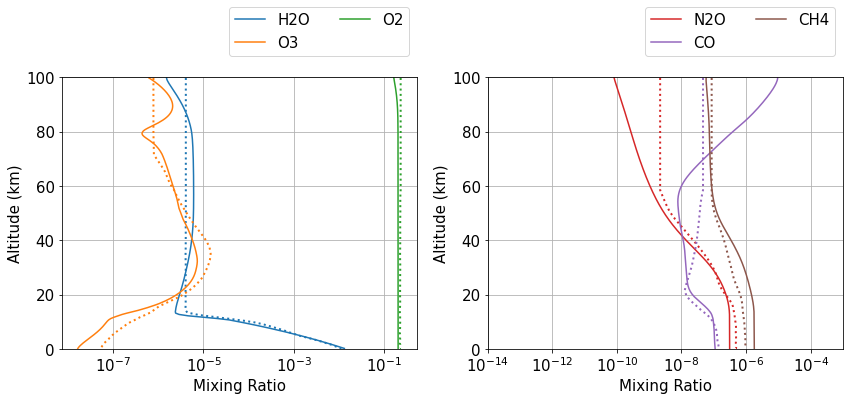

In [7]:
plt.rcParams.update({'font.size': 15})
fig,[ax,ax1] = plt.subplots(1,2,figsize=[14,5])
fig.patch.set_facecolor("w")

sol = pc.mole_fraction_dict()

species = ['H2O','O3','O2']
for i,sp in enumerate(species):
    ax.plot(sol[sp],sol['alt'],label=sp)
    mix = []
    alt = []
    for entry in earth[sp]:
        for en in entry['data']:
            mix.append(en['mix'])
            alt.append(P2alt(en['P']))
    ax.plot(mix,alt,'C'+str(i)+':',lw=2)

ax.grid()
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.legend(ncol=2,bbox_to_anchor=(1,1.05),loc='lower right')
ax.set_xlabel('Mixing Ratio')
ax.set_ylabel('Altitude (km)')

species = ['N2O','CO','CH4']
for i,sp in enumerate(species):
    ax1.plot(sol[sp],sol['alt'],'C'+str(i+3),label=sp)
    mix = []
    alt = []
    for entry in earth[sp]:
        for en in entry['data']:
            mix.append(en['mix'])
            alt.append(P2alt(en['P']))
    ax1.plot(mix,alt,'C'+str(i+3)+':',lw=2)

ax1.grid()
ax1.set_ylim(0,100)
ax1.set_xlim(1e-14,1e-3)
ax1.set_xscale('log')
ax1.legend(ncol=2,bbox_to_anchor=(1,1.05),loc='lower right')
ax1.set_xlabel('Mixing Ratio')
ax1.set_ylabel('Altitude (km)')
    
plt.show()

# Mars

In [8]:
fil = open("planetary-atmosphere-observations/Mars.yaml",'r')
mars = yaml.load(fil)
fil.close()

In [9]:
pc = Atmosphere(zahnle_earth,\
                "../templates/Mars/settings_Mars.yaml",\
                "../templates/ModernEarth/Sun_now.txt",\
                "../templates/Mars/atmosphere_Mars.txt")

In [10]:
success = pc.photochemical_equilibrium()

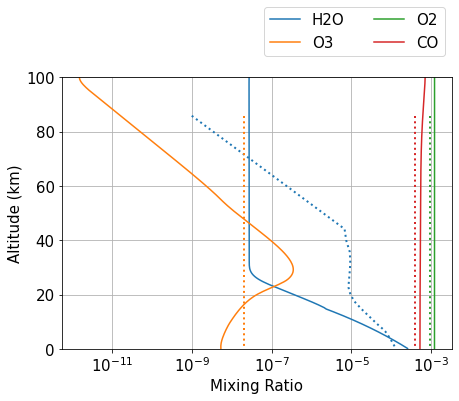

In [11]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[7,5])
fig.patch.set_facecolor("w")

sol = pc.mole_fraction_dict()

species = ['H2O','O3','O2','CO']
for i,sp in enumerate(species):
    ax.plot(sol[sp],sol['alt'],label=sp)
    mix = []
    alt = []
    for entry in mars[sp]:
        for en in entry['data']:
            mix.append(en['mix'])
            alt.append(P2alt(en['P']))
    ax.plot(mix,alt,'C'+str(i)+':',lw=2)

ax.grid()
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.legend(ncol=2,bbox_to_anchor=(1,1.05),loc='lower right')
ax.set_xlabel('Mixing Ratio')
ax.set_ylabel('Altitude (km)')
    
plt.show()

# Titan

In [12]:
fil = open("planetary-atmosphere-observations/titan.yaml",'r')
titan = yaml.load(fil)
fil.close()

In [13]:
pc = Atmosphere(zahnle_earth,\
                "../templates/Titan/settings_Titan.yaml",\
                "../templates/ModernEarth/Sun_now.txt",\
                "../templates/Titan/atmosphere_Titan.txt")

In [14]:
success = pc.photochemical_equilibrium()

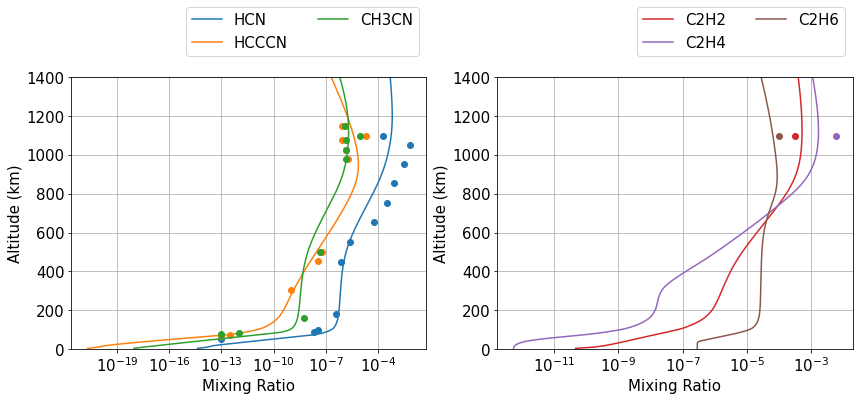

In [15]:
plt.rcParams.update({'font.size': 15})
fig,[ax,ax1] = plt.subplots(1,2,figsize=[14,5])
fig.patch.set_facecolor("w")

sol = pc.mole_fraction_dict()

species = ['HCN','HCCCN','CH3CN']
for i,sp in enumerate(species):
    ax.plot(sol[sp],sol['alt'],label=sp)
    mix = []
    alt = []
    for entry in titan[sp]:
        for en in entry['data']:
            mix.append(en['mix'])
            alt.append(en['alt'])
    ax.plot(mix,alt,'C'+str(i)+'o',lw=2)

ax.grid()
ax.set_ylim(0,1400)
ax.set_xscale('log')
ax.legend(ncol=2,bbox_to_anchor=(1,1.05),loc='lower right')
ax.set_xlabel('Mixing Ratio')
ax.set_ylabel('Altitude (km)')

species = ['C2H2','C2H4','C2H6']
for i,sp in enumerate(species):
    ax1.plot(sol[sp],sol['alt'],'C'+str(i+3),label=sp)
    mix = []
    alt = []
    for entry in titan[sp]:
        for en in entry['data']:
            mix.append(en['mix'])
            alt.append(en['alt'])
    ax1.plot(mix,alt,'C'+str(i+3)+'o',lw=2)

ax1.grid()
ax1.set_ylim(0,1400)
ax1.set_xscale('log')
ax1.legend(ncol=2,bbox_to_anchor=(1,1.05),loc='lower right')
ax1.set_xlabel('Mixing Ratio')
ax1.set_ylabel('Altitude (km)')
    
plt.show()